# THE SPARKS FOUNDATION - DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP

# TASK1 - SUPERVISED ML , BY GUNJAN SINGH 

IN THIS TASK IT IS REQUIRED TO PREDICT THE PERCENTAGE OF A STUDENT ON THE BASIS OF NUMBER OF HOURS STUDIED USING THE LINEAR REGRESSION SUPERVISED MACHINE LEARNING ALGORITHM.

# STEPS:

STEP 1 - IMPORTING THE DATASET

STEP 2 - VISUALIZING THE DATASET

STEP 3 - DATA PREPARATION

STEP 4 - TRAINING THE ALGORITHM

STEP 5 - VISUALIZING THE MODEL

STEP 6 - MAKING PREDICTIONS

STEP 7 - EVALUATING THE MODEL

# STEP 1 - IMPORTING THE DATASET

IN THIS STEP, WE WILL IMPORT THE DATASET THROUGH THE LINK WITH THE HELP OF PANDAS LIBRARY AND THEN WE WILL OBSERVE THE DATA

In [2]:
#read the data from remote link given


import pandas as pd   
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")  #for using data
df        

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.head()           # first five values of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()         # last five values of data   

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape           # shape of data(r,c)  

(25, 2)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.ndim            #dimensions 

2

In [8]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [12]:
df.isnull().sum()            #to check if our database contains null or missing values

Hours     0
Scores    0
dtype: int64

# STEP 2 - VISUALIZING THE DATASET

IN THIS WE WILL PLOT THE DATASET TO CHECK WHETHER WE CAN OBSERVE ANY RELATION BETWEEN THE TWO VARIABLE OR NOT

Text(0, 0.5, 'Percentage SCored')

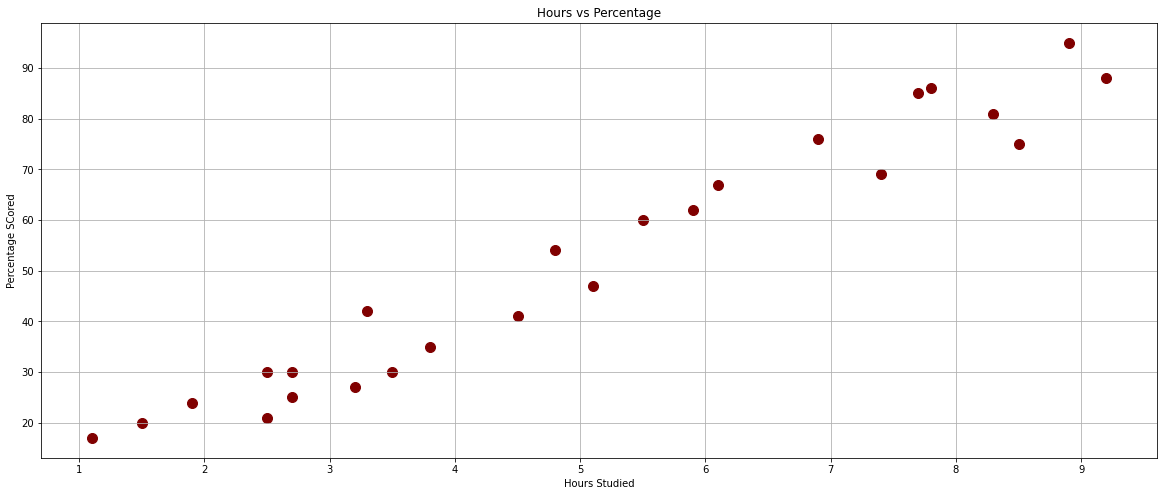

In [13]:
#plotting the database to check whether we can observe any relation between the two variables or not

import matplotlib.pyplot as plt
%matplotlib inline
x=df['Hours']
y=df['Scores']
fig=plt.figure(figsize=(20,8))
plt.scatter(x,y,c='maroon',s=100)
plt.grid(True)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage SCored')

In [14]:
#from the above graph, we canobserve the linear relationship between "Hours Studied" and "Percentage Score". So,we can use the linear regression supervised machine model on it to predict further values.

In [15]:
df.corr()    #correlation between two values

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Density'>

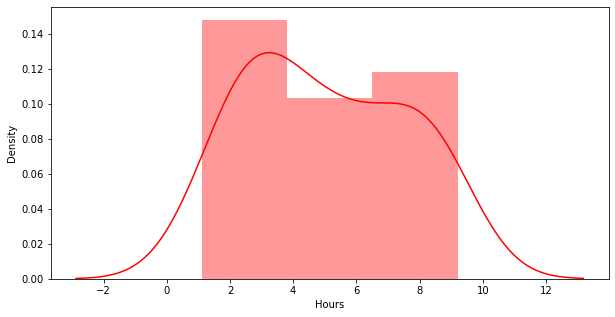

In [18]:
import seaborn as sns
import warnings as wg
wg.filterwarnings("ignore")

plt.figure(figsize=(10,5))
hours=df['Hours']
sns.distplot(hours,color='r')

<AxesSubplot:xlabel='Scores', ylabel='Density'>

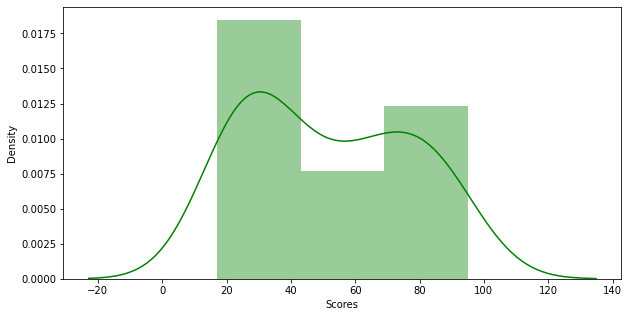

In [19]:
plt.figure(figsize=(10,5))
scores=df['Scores']
fig.set_size_inches(20,20)
sns.distplot(scores,color='g')

# STEP 3 - DATA PREPARATION 

IN THIS STEP WE WILL DIVIDE THE DATA "FEATURES"(INPUT) AND "LABELS"(OUTPUTS). AFTER THAT WE WILL SPLIT THE WHOLE DATASET INTO 2 PARTS - TESTING DATA AND TRAINING DATA.

In [20]:
#using iloc method we will divide the data for further steps
X=df.iloc[:,:1].values
Y=df.iloc[:,1:].values

In [21]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [22]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [23]:
#Splitting data into training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                              test_size=0.2,random_state=50)

# STEP 4 - TRAINING THE ALGORITHM

WE HAVE SPLITED OUR DATA INTO TRAINING AND TESTING SETS, AND NOW WE WILL TRAIN OUR MODEL

In [24]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

# STEP 5 - VISUALIZING THE MODEL

AFTER TRAINING THE MODEL , NOW ITS TIME TO VISUALIZE IT.

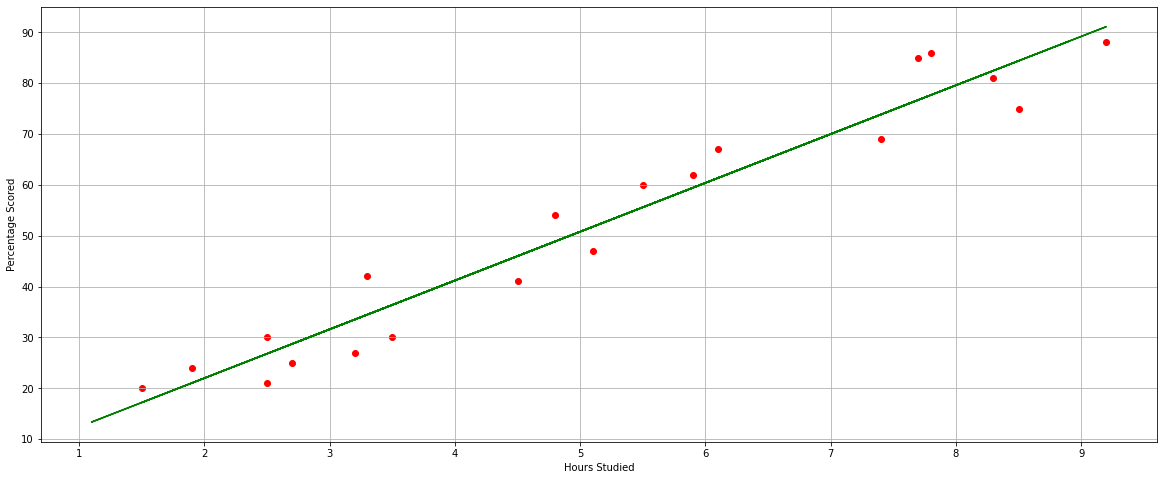

In [25]:
#plot for training data

line=model.coef_*X+model.intercept_

fig=plt.figure(figsize=(20,8))
plt.scatter(X_train,Y_train,color='red')
plt.plot(X,line,color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()

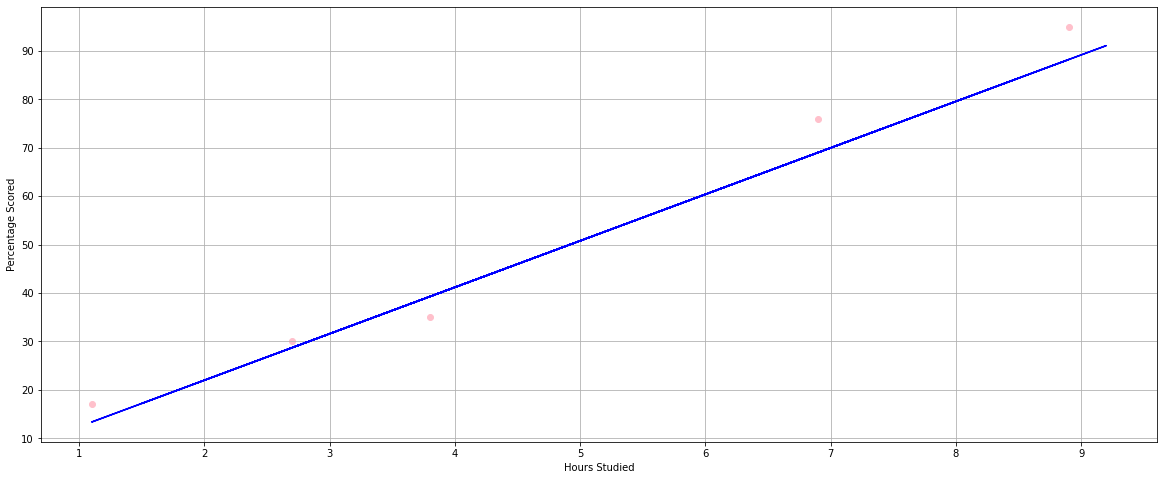

In [26]:
#plot for testing data

fig=plt.figure(figsize=(20,8))
plt.scatter(X_test,Y_test,color='pink')
plt.plot(X,line,color='blue');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()

# STEP 6 - MAKING PREDICTIONS

NOW THAT WE HAVE TRAINED OUR ALGORITHM, IT'S TIME TO MAKE SOME PREDICTIONS.

In [27]:
print(X_test)     #testing data in hours
y_pred=model.predict(X_test)    #predicting the scores

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]]


In [28]:
#compairing Actual vs Predicted

Y_test

array([[95],
       [30],
       [76],
       [35],
       [17]], dtype=int64)

In [29]:
y_pred

array([[88.21139357],
       [28.71845267],
       [69.02012231],
       [39.27365186],
       [13.36543566]])

In [35]:
comp=pd.DataFrame({'Actual':[Y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[95], [30], [76], [35], [17]]","[[88.21139357388516], [28.718452665057836], [6..."


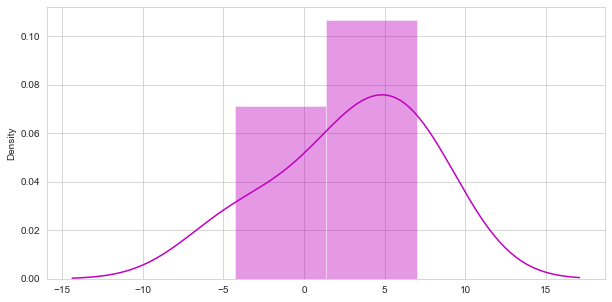

In [30]:
import numpy as np
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
fig.set_size_inches(20,20)
sns.distplot(np.array(Y_test-y_pred),color='m')
plt.show()

In [31]:
#testing with your own data

hours=9.25
own_pred=model.predict([[hours]])
print("The Predicted score if a person studied for",hours,"hours is",own_pred[0])

The Predicted score if a person studied for 9.25 hours is [91.56986604]


# STEP 7 - EVALUATING THE MODEL

IN THE LAST STEP , WE ARE GOING TO EVALUATE OUR TRAINED MODEL BY CALCULATING MEAN ABSOLUTE ERROR

In [32]:
#evaluate our trained model by calculating mean absolute error

from sklearn import metrics
from sklearn.metrics import r2_score


print('Mean Absolute Error :',metrics.mean_absolute_error(Y_test,y_pred))
print('R2 Score :',r2_score(Y_test,y_pred))

Mean Absolute Error : 4.5916495300630285
R2 Score : 0.971014141329942
